In [77]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline
import time

In [108]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

unique, counts = np.unique(y, return_counts=True)

print(dict(zip(unique, counts)))

print(len(df))

{0: 139, 1: 164}
303


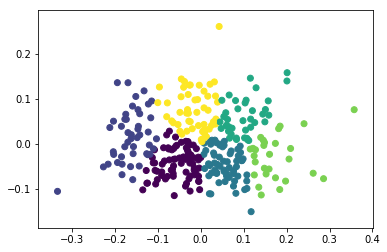

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      33  43
1      35  11
2      13  49
3      22  17
4       5  23
5      31  21


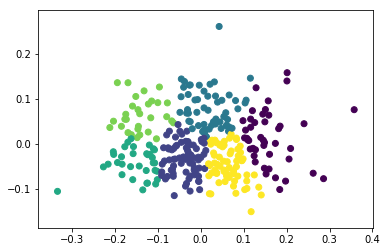

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      13  30
1      34  41
2      35  21
3      19  15
4      24   6
5      14  51


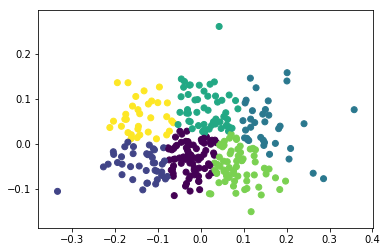

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      33  44
1      19  21
2      14  21
3      33  20
4      13  52
5      27   6


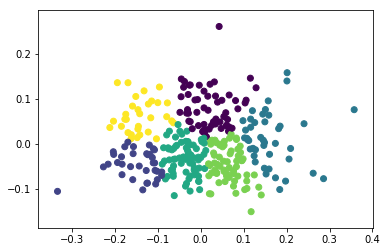

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      36  21
1      18  17
2      12  30
3      34  39
4      14  51
5      25   6


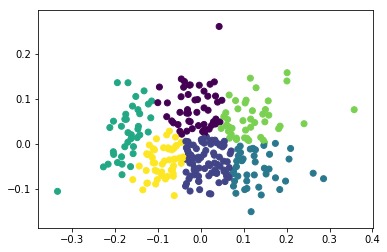

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      31  19
1      25  55
2       7  34
3      30   8
4      23  21
5      23  27


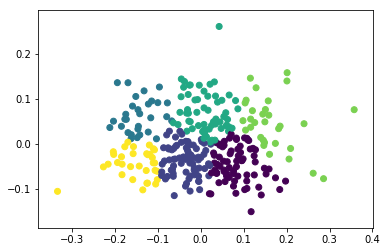

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      15  58
1      33  43
2      24   6
3      36  24
4      13  18
5      18  15


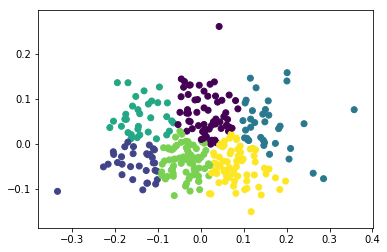

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      37  25
1      18  15
2      14  21
3      27   6
4      29  43
5      14  54


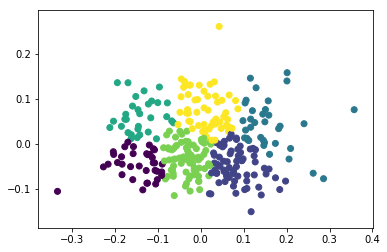

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      18  18
1      14  55
2      14  21
3      25   6
4      34  42
5      34  22
307 ms ± 27.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [155]:
%%timeit pass
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(init='k-means++', n_clusters=6).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

# Accuracy tables.
table = pd.crosstab(y_pred, y, margins=True)


In [156]:
%%timeit pass
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=6,
    batch_size=400)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini,y))

Comparing k-means and mini batch k-means solutions:
col_0   0   1
row_0        
0      23  22
1      24   8
2      32  44
3      16   7
4      31  27
5      13  56
Comparing k-means and mini batch k-means solutions:
col_0   0   1
row_0        
0       3  17
1      33  21
2      22  14
3      31  42
4      36  18
5      14  52
Comparing k-means and mini batch k-means solutions:
col_0   0   1
row_0        
0      29  19
1      32  33
2       7  43
3      32  26
4      16  35
5      23   8
Comparing k-means and mini batch k-means solutions:
col_0   0   1
row_0        
0      25  14
1      27  37
2      21   9
3      10  48
4      32  48
5      24   8
Comparing k-means and mini batch k-means solutions:
col_0   0   1
row_0        
0      18  32
1      19   2
2      30  39
3      20  16
4      32  21
5      20  54
Comparing k-means and mini batch k-means solutions:
col_0   0   1
row_0        
0      21  11
1      26  34
2       8  27
3      19  60
4      36  24
5      29   8
Comparing k-mean

5      13  54
Comparing k-means and mini batch k-means solutions:
col_0   0   1
row_0        
0      24  11
1      28  17
2      15  49
3      31  19
4       8  33
5      33  35
Comparing k-means and mini batch k-means solutions:
col_0   0   1
row_0        
0       8   3
1      12  51
2      33  43
3      11  28
4      40  28
5      35  11
Comparing k-means and mini batch k-means solutions:
col_0   0   1
row_0        
0      13  21
1      27   9
2      26  13
3      31  37
4      18  28
5      24  56
Comparing k-means and mini batch k-means solutions:
col_0   0   1
row_0        
0      15  10
1      33  18
2      10  45
3      33  45
4      26  16
5      22  30
Comparing k-means and mini batch k-means solutions:
col_0   0   1
row_0        
0      22  15
1      34  11
2       9  42
3       8  24
4      32  28
5      34  44
Comparing k-means and mini batch k-means solutions:
col_0   0   1
row_0        
0      14  51
1      27   6
2      31  40
3      34  22
4      18  15
5      15  30
Co

When we increase the number of clusters it seems to be more overlap between then than when compared to the 2 clusters. Moreover, more outliers appear within each cluster. I don´t find any solution compelling enough, at least compared to the first example with two clusters, as when the number of clousters grows the overalp between them too, being the distances between clusters too small.
From a computational perspective, the increase from two to six clusters does not affect the computational time 7% when multiplying by three the number of clusters. When comparing the nomal k-means algorithm with the minibatch with batches of 200 samples, the time required by the former is 9.3 times bigger than the latter (299 ms per loop vs 32.1 ms per loop).